# Machine Learning Lab 1

## Assignment 2 (Deadline : 4/12/2022 11:59PM)

Total Points : 100

Your answers must be entered in LMS by midnight of the day it is due. 

If the question requires a textual response, you can create a PDF and upload that. 

The PDF might be generated from MS-WORD, LATEX, the image of a hand- written response, or using any other mechanism. 

Code must be uploaded and may require demonstration to the TA. 

Numbers in the parentheses indicate points allocated to the question. 

**Naming Convention**: FirstName_LastName_Lab2_TLP23.ipynb

# Question 1 (50 points)

In [1]:
#Importing Libraries for Analysis and EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
#Downloading data.csv
!gdown --id 1Goz2sOFGhL4jUVAYd3QWCTTof6NGxTCn --o 'data.csv'

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Goz2sOFGhL4jUVAYd3QWCTTof6NGxTCn
To: /content/data.csv
100% 62.7k/62.7k [00:00<00:00, 54.5MB/s]


## 1. Read the data into a numpy array

In [2]:
# Read data from file: 'data.csv'. 
# Note that the first row has the number of inputs and number of outputs specified.
# For your reference: you can use "np.loadtxt"
data = np.loadtxt('data.csv', skiprows=1, delimiter=',')
data

array([[  51.87,   79.72, 1249.99],
       [ -30.66,  -15.64, -516.61],
       [ -57.57,   94.22,  312.09],
       ...,
       [ -18.6 ,   32.61,  -45.14],
       [ -38.31,   77.81,  -20.13],
       [ -38.33,   45.69, -460.47]])

## 2. Plot and explore the data to get a better understanding

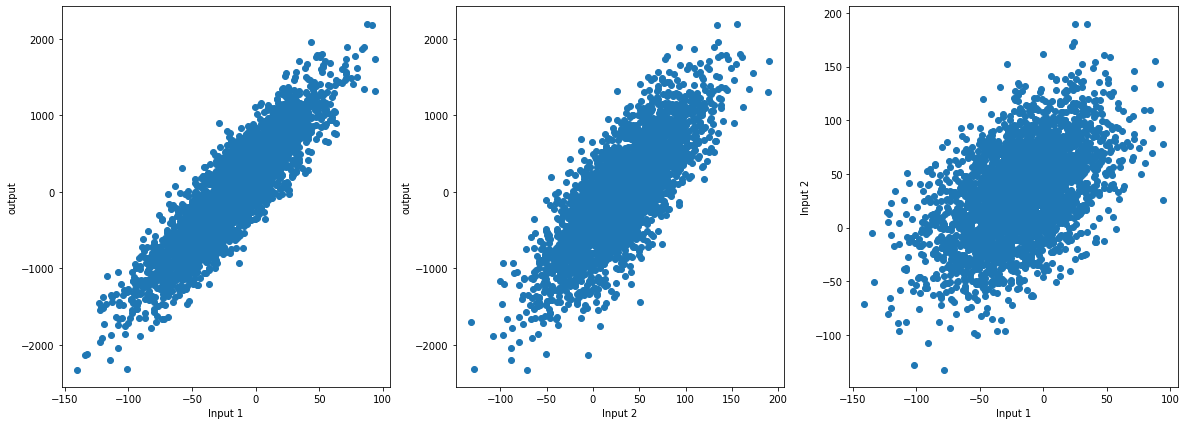

In [3]:
# EDA

#Taking the object oriented approach for plotting
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,7))

ax[0].scatter(y=data[:,2], x = data[:,0])
ax[0].set(xlabel="Input 1")
ax[0].set(ylabel = "output")
ax[1].scatter(y=data[:,2], x = data[:,1])
ax[1].set(xlabel="Input 2")
ax[1].set(ylabel = "output")
ax[2].scatter(y=data[:,1], x = data[:,0])
ax[2].set(xlabel="Input 1")
ax[2].set(ylabel = "Input 2")
plt.show()

In [4]:
#Checking Correlation Coefficient
np.corrcoef(data, rowvar = False)
#Both inputs are highly correlated with the output, however not as much with each other

array([[1.        , 0.49902775, 0.89002879],
       [0.49902775, 1.        , 0.78639191],
       [0.89002879, 0.78639191, 1.        ]])

Text(0.5, 1.0, 'Output')

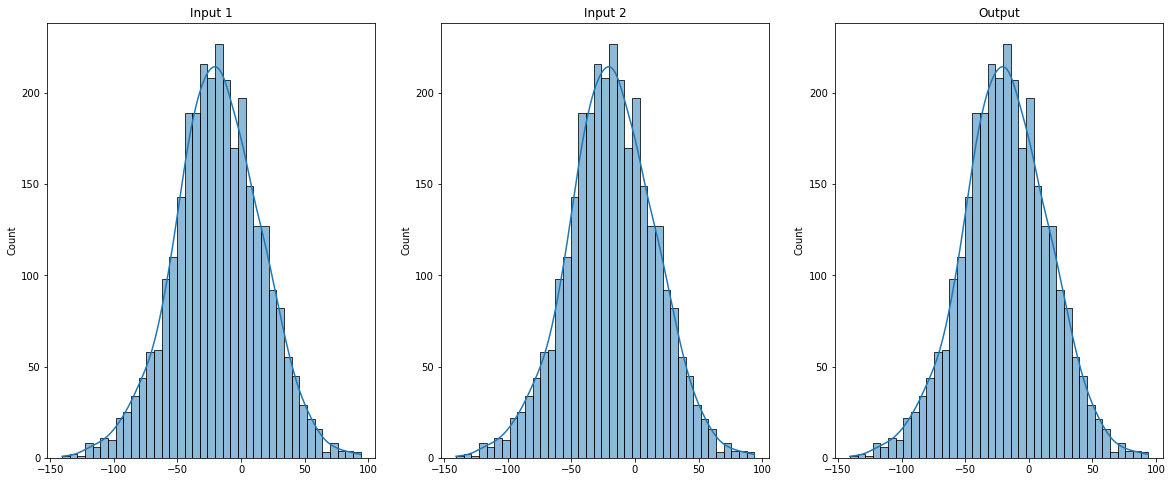

In [5]:
#Plotting Distributions
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.histplot(data[:,0], kde=True, ax = ax[0])
ax[0].set_title('Input 1')
sns.histplot(data[:,0], kde=True, ax = ax[1])
ax[1].set_title('Input 2')
sns.histplot(data[:,0], kde=True, ax = ax[2])
ax[2].set_title('Output')

In [6]:
#3D Scatter Plot
import plotly.express as px
fig = px.scatter_3d(pd.DataFrame(data), x = 0, y = 1, z = 2, labels = {'0':'Input 1', '1':'Input 2', '2':'Output'})
fig.show()

## 3. Prepare the data for modelling

In [7]:
# Separate the data: input and output.
X = data[:,:2]
y = data[:,2]

In [8]:
# Perform a train-val-test split of 60-20-20.
# Use "random_state=42".
# For your reference: you can use "train_test_split" from sklearn twice to perform this.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.4)

In [9]:
#Checking Shapes
X_train.shape

(1800, 2)

In [10]:
X_test.shape

(1200, 2)

In [11]:
y_train.shape

(1800,)

In [12]:
#Splitting again
X_val,X_test,y_val,y_test = train_test_split(X_test, y_test, random_state = 42, test_size = 0.5)

In [13]:
#Checking Shapes again
X_val.shape

(600, 2)

In [14]:
X_test.shape

(600, 2)

In [15]:
y_test.shape

(600,)

 * From your understanding of the dataset, is stratified sampling necessary in this case? Why / Why not?


In [16]:
"""
To use stratified sampling, we need to be able to divide our data into subgroups. Here our data isn't divisible into different subgroups
"""

"\nTo use stratified sampling, we need to be able to divide our data into subgroups. Here our data isn't divisible into different subgroups\n"

## 4. Modelling

### 4.1 Linear Regression

In [17]:
# Implement Linear Regression.
# Use both train and val data for training purpose.
# Make preditions on both training(train+val) and test data.
from sklearn.linear_model import LinearRegression

lrmodel = LinearRegression()
lrmodel.fit(np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)))

LinearRegression()

In [18]:
#Predictions
lr_tv_pred = lrmodel.predict(np.concatenate((X_train, X_val)))
lr_pred = lrmodel.predict(X_test)

### 4.2 Ridge Reegression

In [19]:
# Implement Ridge Regression.
# Perform cross validation to find a good value for your hyper-parameter.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.
from sklearn.linear_model import Ridge

In [20]:
#Checking the list of scorers
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [21]:
from sklearn.model_selection import cross_val_score
temp = {} #For finding the best alpha

#Creating a list of alphas -> started from 1,1000
#Then narrowed the range down to wherever it was the best alpha
ridge_alphas = [x for x in np.linspace(160,180)]

for x in ridge_alphas:
    score = np.mean(cross_val_score(estimator=Ridge(alpha=x), scoring='r2', 
                                    X = np.concatenate((X_train, X_val)), 
                                    y = np.concatenate((y_train, y_val))))
    print("Alpha: ", x, "Score: ", score)
    temp[score] = x
r_alpha = temp[max(temp.keys())]
print('Best Alpha:', r_alpha)

Alpha:  160.0 Score:  0.9471166368749462
Alpha:  160.40816326530611 Score:  0.9471166368758521
Alpha:  160.81632653061226 Score:  0.9471166368767294
Alpha:  161.22448979591837 Score:  0.947116636877578
Alpha:  161.6326530612245 Score:  0.947116636878398
Alpha:  162.0408163265306 Score:  0.9471166368791893
Alpha:  162.44897959183675 Score:  0.9471166368799521
Alpha:  162.85714285714286 Score:  0.947116636880686
Alpha:  163.26530612244898 Score:  0.9471166368813915
Alpha:  163.6734693877551 Score:  0.947116636882068
Alpha:  164.08163265306123 Score:  0.9471166368827163
Alpha:  164.48979591836735 Score:  0.9471166368833355
Alpha:  164.89795918367346 Score:  0.9471166368839261
Alpha:  165.30612244897958 Score:  0.9471166368844883
Alpha:  165.71428571428572 Score:  0.9471166368850217
Alpha:  166.12244897959184 Score:  0.9471166368855265
Alpha:  166.53061224489795 Score:  0.9471166368860026
Alpha:  166.9387755102041 Score:  0.9471166368864502
Alpha:  167.3469387755102 Score:  0.9471166368868

In [22]:
#Creating the model and fitting the data
lr_ridge = Ridge(alpha = r_alpha)
lr_ridge.fit(np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)))

#Generating predictions on both train+val and test
ridge_tv_pred = lr_ridge.predict(np.concatenate((X_train, X_val)))
ridge_pred = lr_ridge.predict(X_test)

### 4.3 Lasso Regression

In [23]:
# Implement Lasso Regression.
# Perform cross validation to find a good value for your hyper-parameter.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.
from sklearn.linear_model import Lasso

In [24]:
from sklearn.model_selection import cross_val_score
temp = {} #For finding the best alpha

#Creating a list of alphas -> again started from 1 to 1000 and narrowed down
lasso_alphas = [x for x in np.linspace(1,10)]

for x in lasso_alphas:
    score = np.mean(cross_val_score(estimator=Lasso(alpha=x), scoring='r2', X = np.concatenate((X_train, X_val)), y = np.concatenate((y_train, y_val))))
    #score = sum(cross_val_score(estimator=Lasso(alpha=x), X = X, y = y)) #Cross validating on the entire data?
    print("Alpha: ", x, "Score: ", score)
    temp[score] = x
l_alpha = temp[max(temp.keys())]
print('Best Alpha:', l_alpha)

Alpha:  1.0 Score:  0.9471166474010259
Alpha:  1.183673469387755 Score:  0.9471166475267884
Alpha:  1.3673469387755102 Score:  0.9471166475032587
Alpha:  1.5510204081632653 Score:  0.9471166473304372
Alpha:  1.7346938775510203 Score:  0.9471166470083237
Alpha:  1.9183673469387754 Score:  0.9471166465369178
Alpha:  2.1020408163265305 Score:  0.94711664591622
Alpha:  2.2857142857142856 Score:  0.9471166451462303
Alpha:  2.4693877551020407 Score:  0.9471166442269482
Alpha:  2.6530612244897958 Score:  0.9471166431583743
Alpha:  2.836734693877551 Score:  0.9471166419405082
Alpha:  3.0204081632653064 Score:  0.9471166405733502
Alpha:  3.2040816326530615 Score:  0.9471166390568998
Alpha:  3.3877551020408165 Score:  0.9471166373911576
Alpha:  3.5714285714285716 Score:  0.9471166355761232
Alpha:  3.7551020408163267 Score:  0.9471166336117968
Alpha:  3.938775510204082 Score:  0.9471166314981785
Alpha:  4.122448979591837 Score:  0.9471166292352677
Alpha:  4.3061224489795915 Score:  0.947116626823

In [25]:
#Model fitting
lr_lasso = Lasso(alpha = l_alpha)
lr_lasso.fit(np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)))
#Generating Predictions
lasso_tv_pred = lr_lasso.predict(np.concatenate((X_train, X_val)))
lasso_pred = lr_lasso.predict(X_test)

### 4.4 ElasticNet Regression

In [26]:
# Implement ElasticNet Regression.
# Perform cross validation to find a good value for your hyper-parameters.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.
from sklearn.linear_model import ElasticNet

In [27]:
from sklearn.model_selection import cross_val_score
temp = {} #For finding the best alpha

#Creating a list of alphas -> again started from 1 to 1000 and narrowed down
en_alphas = [x for x in np.linspace(0.001,1.001)]

for x in en_alphas:
    score = np.mean(cross_val_score(estimator=ElasticNet(alpha=x), scoring='r2',  X = np.concatenate((X_train, X_val)), y = np.concatenate((y_train, y_val))))
    #score = sum(cross_val_score(estimator=ElasticNet(alpha=x), X = X, y = y)) #Cross validating on the entire data?
    print("Alpha: ", x, "Score: ", score)
    temp[score] = x

en_alpha = temp[max(temp.keys())]
print('Best Alpha:', en_alpha)

Alpha:  0.001 Score:  0.9471166343958892
Alpha:  0.02140816326530612 Score:  0.9471166356785492
Alpha:  0.04181632653061224 Score:  0.9471166295542085
Alpha:  0.06222448979591837 Score:  0.947116638675465
Alpha:  0.08263265306122448 Score:  0.9471166390619757
Alpha:  0.1030408163265306 Score:  0.947116639371796
Alpha:  0.12344897959183673 Score:  0.9471166396049296
Alpha:  0.14385714285714285 Score:  0.947116639761381
Alpha:  0.16426530612244897 Score:  0.9471166497923857
Alpha:  0.18467346938775508 Score:  0.9471166124360195
Alpha:  0.2050816326530612 Score:  0.9471166124075809
Alpha:  0.22548979591836732 Score:  0.9471166475553513
Alpha:  0.24589795918367346 Score:  0.9471166474062901
Alpha:  0.26630612244897955 Score:  0.9471166471805532
Alpha:  0.2867142857142857 Score:  0.9471166468781445
Alpha:  0.3071224489795918 Score:  0.9471166464990682
Alpha:  0.32753061224489793 Score:  0.9471166460433285
Alpha:  0.3479387755102041 Score:  0.9471166455109291
Alpha:  0.36834693877551017 Scor

In [28]:
#Model Creation
lr_en = ElasticNet(alpha = en_alpha)
lr_en.fit(np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)))
#Predicting Values
elastic_tv_pred = lr_en.predict(np.concatenate((X_train, X_val)))
elastic_pred = lr_en.predict(X_test)

In [29]:
# Write down the actual value along with the preditions from all the regression models, for the first 10 points in test data.
test = pd.DataFrame(X_test)
test['Output'] = y_test
test['LR_pred'] = lr_pred
test['Ridge_pred'] = ridge_pred
test['Lasso_pred'] = lasso_pred
test['ElasticNet_pred'] = elastic_pred
test.head(10)

,0,1,Output,LR_pred,Ridge_pred,Lasso_pred,ElasticNet_pred
0,2.99,26.90,280.16,232.929309,232.912447,232.918930,232.910198
1,-47.32,67.71,-193.86,-117.439635,-117.414961,-117.437282,-117.412926
2,4.14,74.28,619.91,583.259754,583.243639,583.228992,583.239451
3,-75.54,79.40,-305.45,-393.335976,-393.288396,-393.321822,-393.283532
4,-21.35,49.72,-31.10,85.216456,85.219798,85.210958,85.219504
5,-11.25,40.17,280.18,145.938591,145.933546,145.931102,145.932445
6,-47.58,1.12,-700.85,-592.569438,-592.546894,-592.539237,-592.542291
7,17.48,49.37,747.05,576.334435,576.306811,576.306156,576.302025
8,-64.03,14.13,-777.72,-709.495395,-709.459282,-709.460893,-709.453266
9,43.40,66.31,836.78,1025.852134,1025.804443,1025.801507,1025.796003


In [30]:
#Values from training+validation set

trainplusval = pd.DataFrame(np.concatenate((X_train, X_val)))
trainplusval['Output'] = np.concatenate((y_train, y_val))

trainplusval['LR_pred'] = lr_tv_pred
trainplusval['Ridge_pred'] = ridge_tv_pred
trainplusval['Lasso_pred'] = lasso_tv_pred
trainplusval['ElasticNet_pred'] = elastic_tv_pred
trainplusval.head(10)

,0,1,Output,LR_pred,Ridge_pred,Lasso_pred,ElasticNet_pred
0,19.02,59.62,697.48,668.537130,668.508639,668.503680,668.503283
1,-67.12,43.12,-406.58,-543.365545,-543.325951,-543.341275,-543.320681
2,0.24,43.20,330.79,313.465917,313.451820,313.450384,313.449269
3,-34.00,15.00,-528.04,-321.596632,-321.584426,-321.580222,-321.581928
4,15.67,19.51,-14.25,341.752524,341.725296,341.737733,341.721857
5,-26.19,94.05,301.25,337.792583,337.801339,337.771507,337.799918
6,12.28,72.12,695.85,671.428815,671.406135,671.394145,671.401085
7,-11.39,11.64,255.27,-57.990927,-57.996862,-57.986469,-57.996860
8,7.72,77.99,595.87,655.055157,655.036318,655.020739,655.031574
9,-1.74,35.12,389.55,231.045621,231.032818,231.034617,231.030806


## 5. Analysis

In [31]:
# Find both RMSE and MAE for all the regression models on both training(train+val) and testing data.
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [32]:
#For Test Dataset
#RMSE
lr_rmse = np.sqrt(mean_squared_error(test.Output, test.LR_pred))
ridge_rmse = np.sqrt(mean_squared_error(test.Output, test.Ridge_pred))
lasso_rmse = np.sqrt(mean_squared_error(test.Output, test.Lasso_pred))
elasticnet_rmse = np.sqrt(mean_squared_error(test.Output, test.ElasticNet_pred))

print("Linear Regression RMSE: ", lr_rmse)
print("Ridge Regression RMSE: ", ridge_rmse)
print("Lasso Regression RMSE: ", lasso_rmse)
print("ElasticNet Regression RMSE: ", elasticnet_rmse)

#MAE
lr_mae = mean_absolute_error(test.Output, test.LR_pred)
ridge_mae = mean_absolute_error(test.Output, test.Ridge_pred)
lasso_mae = mean_absolute_error(test.Output, test.Lasso_pred)
elasticnet_mae = mean_absolute_error(test.Output, test.ElasticNet_pred)

print("Linear Regression MAE: ", lr_mae)
print("Ridge Regression MAE: ", ridge_mae)
print("Lasso Regression MAE: ", lasso_mae)
print("ElasticNet Regression MAE: ", elasticnet_mae)

#R2-Score
from sklearn.metrics import r2_score
lr_r2 = r2_score(test.Output, test.LR_pred)
ridge_r2 = r2_score(test.Output, test.Ridge_pred)
lasso_r2 = r2_score(test.Output, test.Lasso_pred)
elasticnet_r2 = r2_score(test.Output, test.ElasticNet_pred)

print("Linear Regression R2: ", lr_r2)
print("Ridge Regression R2: ", ridge_r2)
print("Lasso Regression R2: ", lasso_r2)
print("ElasticNet Regression R2: ", elasticnet_r2)

Linear Regression RMSE:  150.07580785362734
Ridge Regression RMSE:  150.07655960163828
Lasso Regression RMSE:  150.0754083611042
ElasticNet Regression RMSE:  150.0765759018083
Linear Regression MAE:  122.07928991403304
Ridge Regression MAE:  122.08092311409972
Lasso Regression MAE:  122.08018049698896
ElasticNet Regression MAE:  122.08114890668391
Linear Regression R2:  0.9502316143025633
Ridge Regression R2:  0.9502311157094964
Lasso Regression R2:  0.950231879262943
ElasticNet Regression R2:  0.9502311048984633


In [33]:
#For Training and validation Dataset

#RMSE
lr_rmse = np.sqrt(mean_squared_error(trainplusval.Output, trainplusval.LR_pred))
ridge_rmse = np.sqrt(mean_squared_error(trainplusval.Output, trainplusval.Ridge_pred))
lasso_rmse = np.sqrt(mean_squared_error(trainplusval.Output, trainplusval.Lasso_pred))
elasticnet_rmse = np.sqrt(mean_squared_error(trainplusval.Output, trainplusval.ElasticNet_pred))

print("Linear Regression RMSE: ", lr_rmse)
print("Ridge Regression RMSE: ", ridge_rmse)
print("Lasso Regression RMSE: ", lasso_rmse)
print("ElasticNet Regression RMSE: ", elasticnet_rmse)

#MAE
lr_mae = mean_absolute_error(trainplusval.Output, trainplusval.LR_pred)
ridge_mae = mean_absolute_error(trainplusval.Output, trainplusval.Ridge_pred)
lasso_mae = mean_absolute_error(trainplusval.Output, trainplusval.Lasso_pred)
elasticnet_mae = mean_absolute_error(trainplusval.Output, trainplusval.ElasticNet_pred)

print("Linear Regression MAE: ", lr_mae)
print("Ridge Regression MAE: ", ridge_mae)
print("Lasso Regression MAE: ", lasso_mae)
print("ElasticNet Regression MAE: ", elasticnet_mae)

#R2-Score
from sklearn.metrics import r2_score
lr_r2 = r2_score(trainplusval.Output, trainplusval.LR_pred)
ridge_r2 = r2_score(trainplusval.Output, trainplusval.Ridge_pred)
lasso_r2 = r2_score(trainplusval.Output, trainplusval.Lasso_pred)
elasticnet_r2 = r2_score(trainplusval.Output, trainplusval.ElasticNet_pred)

print("Linear Regression R2: ", lr_r2)
print("Ridge Regression R2: ", ridge_r2)
print("Lasso Regression R2: ", lasso_r2)
print("ElasticNet Regression R2: ", elasticnet_r2)

Linear Regression RMSE:  151.21511893332465
Ridge Regression RMSE:  151.21512128985836
Lasso Regression RMSE:  151.21512250856554
ElasticNet Regression RMSE:  151.21512220455975
Linear Regression MAE:  119.95098540376833
Ridge Regression MAE:  119.95121853208039
Lasso Regression MAE:  119.95110313958764
ElasticNet Regression MAE:  119.95124709952239
Linear Regression R2:  0.947459768942611
Ridge Regression R2:  0.947459767305039
Lasso Regression R2:  0.9474597664581507
ElasticNet Regression R2:  0.9474597666694065


## 6. Final Observations
Write down your final conclusions and observations

In [34]:
#Generating Equations from single input variables
model = LinearRegression()
#Taking Input 1
model.fit(X_train[:,0].reshape(-1,1), y_train)
i1_coef = model.coef_[0]
i1_in = model.intercept_
i1_r2 = r2_score(y_test, model.predict(X_test[:,0].reshape(-1,1)))

#Taking Input 2
model.fit(X_train[:,1].reshape(-1,1), y_train)
i2_coef = model.coef_[0]
i2_in = model.intercept_
i2_r2 = r2_score(y_test, model.predict(X_test[:,1].reshape(-1,1)))

In [35]:
#Writing Down Equations
print(f"Normal LR:       y = {lrmodel.coef_[0]} x1 + {lrmodel.coef_[1]} x2 + {lrmodel.intercept_}")
print(f"Ridge LR:        y = {lr_ridge.coef_[0]} x1 + {lr_ridge.coef_[1]} x2 + {lr_ridge.intercept_}       | alpha = {r_alpha}")
print(f"Lasso LR:        y = {lr_lasso.coef_[0]} x1 + {lr_lasso.coef_[1]} x2 + {lr_lasso.intercept_}       | alpha = {l_alpha}")
print(f"ElasticNet LR:   y = {lr_en.coef_[0]} x1 + {lr_en.coef_[1]} x2 + {lr_en.intercept_}       | alpha = {en_alpha}\n")
print(f"LR Input1 Only:  y = {i1_coef} x1 + 0 x2 + {i1_in}             | r2 = {i1_r2}")
print(f"LR Input2 Only:  y = 0 x1 + {i2_coef} x2 + {i2_in}           | r2 = {i2_r2} ")

Normal LR:       y = 12.711766935861574 x1 + 7.085519488018747 x2 + 4.320651371788761
Ridge LR:        y = 12.710969808975772 x1 + 7.085554596852726 x2 + 4.305228429048503       | alpha = 173.0612244897959
Lasso LR:        y = 12.711176514955755 x1 + 7.085103610835145 x2 + 4.323225440646388       | alpha = 1.183673469387755
ElasticNet LR:   y = 12.710853754113753 x1 + 7.085516484291957 x2 + 4.304352204118777       | alpha = 0.16426530612244897

LR Input1 Only:  y = 17.11737933537939 x1 + 0 x2 + 304.3718436679114             | r2 = 0.8068429610161586
LR Input2 Only:  y = 0 x1 + 12.173812309645836 x2 + -387.7677885943832           | r2 = 0.6300603323790753 


Conclusion:

Even though we've implemented different versions of linear regression, our equations are almost the same. Let us go through the possible alternatives here:

For Ridge:
    
    Alternative 1:  12x1 + 7x2 + 4 -> l2 norm of betas = sqrt(193)
    Alternative 2:  17x1 + 304     -> l2 norm of betas = sqrt(289)
    Alternative 3:  12x2 - 387     -> l2 norm of betas = sqrt(144)

For Lasso:
    
    Alternative 1:  12x1 + 7x2 + 4 -> l1 norm of betas = 19
    Alternative 2:  17x1 + 304     -> l1 norm of betas = 17
    Alternative 3:  12x2 - 387     -> l1 norm of betas = 12

*Note: Intercept is ignored when calculating beta norms*

However, we've still chosen the best hyperparameter based on r2_score. If our hyperparameter were to be very large, then ridge, lasso and elasticnet would definitely choose the third alternative. However then, our r2_score would've been 0.63 which is extremely less. Similarly, r2_score for the second alternative is 0.8 which is comparatively lesser than 0.935 that we're getting. 

Because we searched for the best hyperparameter with the objective of getting a higher r2_score, we get the same equation in all the models

# Question 2 (30 points)

Given the automobile dataset at https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv , 

## 1. Load and examine the dataset

In [36]:
#I'm considering price as my target variable
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [38]:
#treating some categorical variables
df['num-of-doors'].value_counts()

four    115
two      86
Name: num-of-doors, dtype: int64

In [39]:
df['num-of-doors'] = df['num-of-doors'].map({'four':4, 'two':2})

In [40]:
df['num-of-cylinders'].value_counts()

four      157
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [41]:
df['num-of-cylinders'] = df['num-of-cylinders'].map({
    'four':4, 'six':6, 'five':5, 'two':2, 'eight':8, 'three':3, 'twelve':12
})

In [42]:
#We'll use it to compare metrics since feature reduction shouldn't impact accuracy scores
alldata = df.copy()

In [43]:
categorical = df.select_dtypes(include = ['object']).columns
categorical

Index(['make', 'aspiration', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type', 'fuel-system', 'horsepower-binned'],
      dtype='object')

In [44]:
numeric = df.select_dtypes(exclude=['object']).columns
numeric

Index(['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'city-L/100km',
       'diesel', 'gas'],
      dtype='object')

In [45]:
#Checking if the choice of diesel and gas is binary
#ie, if diesel is 1 then gas has to be 0
#Then all the values in summing them up should be 1
(df.diesel + df.gas).value_counts()

1    201
dtype: int64

In [46]:
#Inspecting Horsepower-binned
df[['horsepower', 'horsepower-binned']].groupby(by = 'horsepower-binned').agg([np.max, np.min])

horsepower       
                        amax   amin
horsepower-binned                  
High                   207.0  156.0
Low                    101.0   48.0
Medium                 155.0  102.0

In [47]:
#gas can be dropped since it is dependent on diesel
#horsepower-binned can be dropped since it is derived from horsepower
drop_variables = ['gas', 'horsepower-binned']

## 2. Visualise/Plot the regression model

In [48]:
#Inspecting Categorical Variables
for var in categorical:
    print(var, "Value Counts: ")
    print(df[var].value_counts(normalize=True))
    print()

make Value Counts: 
toyota           0.159204
nissan           0.089552
mazda            0.084577
mitsubishi       0.064677
honda            0.064677
volkswagen       0.059701
subaru           0.059701
peugot           0.054726
volvo            0.054726
dodge            0.044776
mercedes-benz    0.039801
bmw              0.039801
plymouth         0.034826
audi             0.029851
saab             0.029851
porsche          0.019900
jaguar           0.014925
chevrolet        0.014925
alfa-romero      0.014925
isuzu            0.009950
renault          0.009950
mercury          0.004975
Name: make, dtype: float64

aspiration Value Counts: 
std      0.820896
turbo    0.179104
Name: aspiration, dtype: float64

body-style Value Counts: 
sedan          0.467662
hatchback      0.338308
wagon          0.124378
hardtop        0.039801
convertible    0.029851
Name: body-style, dtype: float64

drive-wheels Value Counts: 
fwd    0.587065
rwd    0.373134
4wd    0.039801
Name: drive-wheels, dtype: f

In [49]:
# Variables that seem imbalanced -> ['engine-location', 'aspiration']

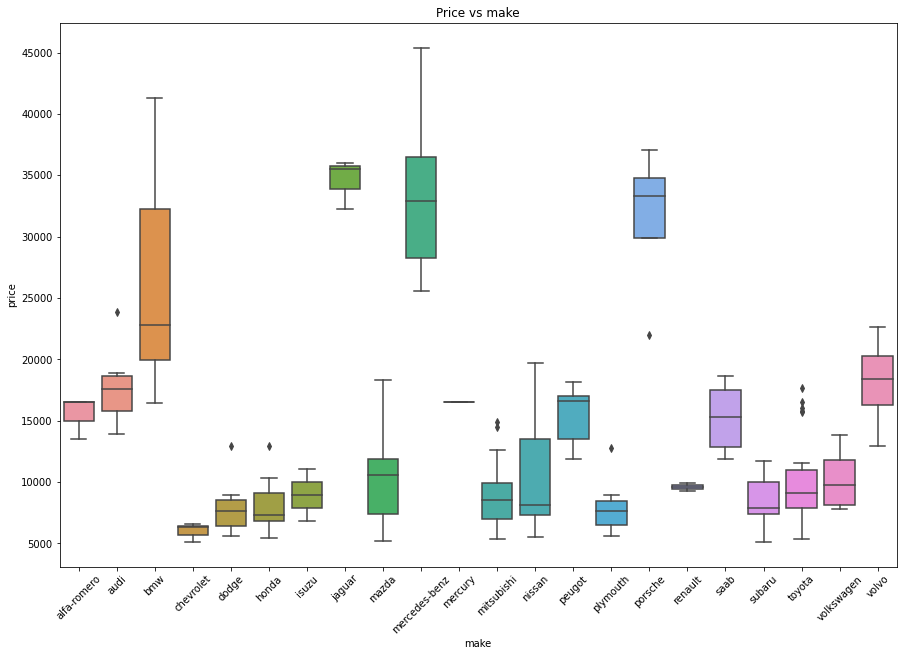

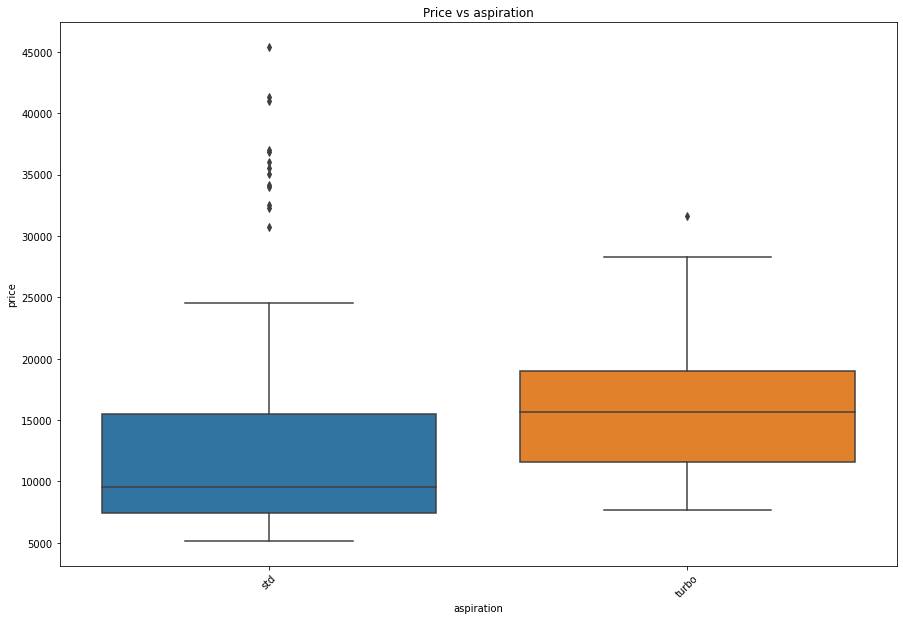

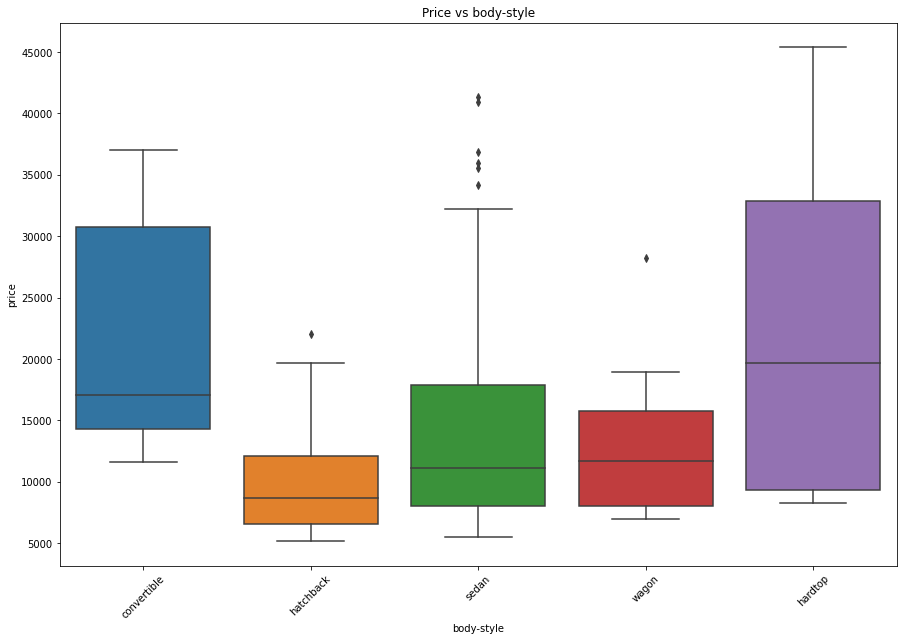

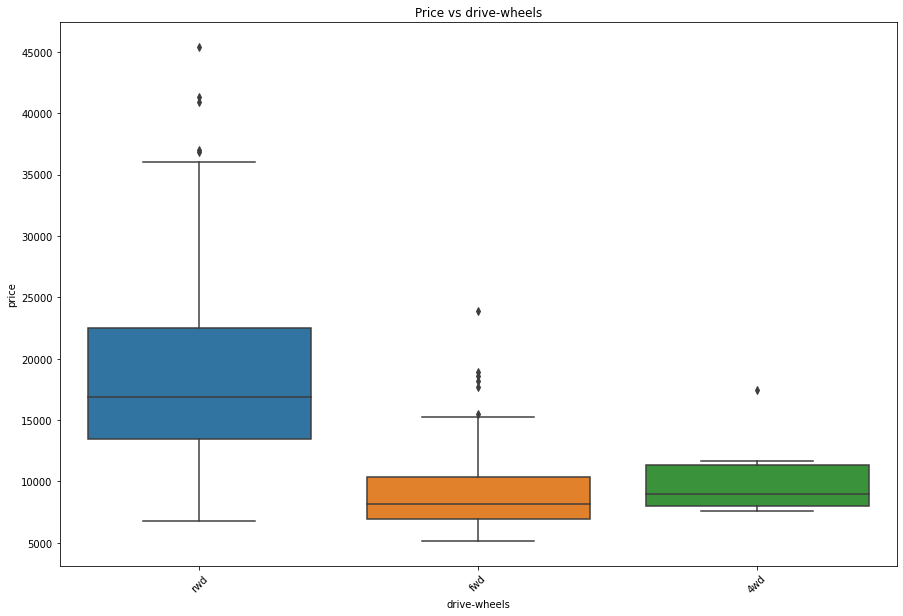

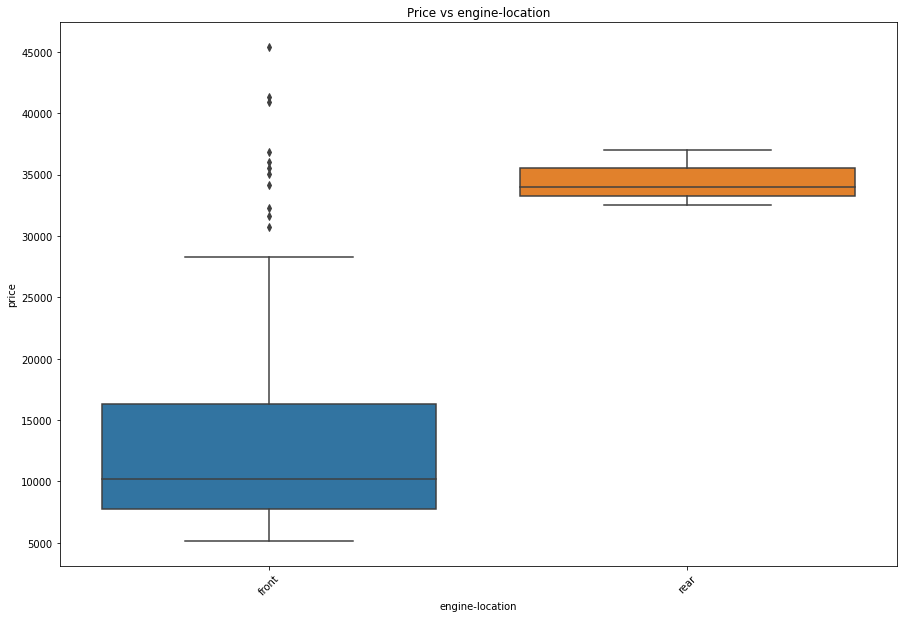

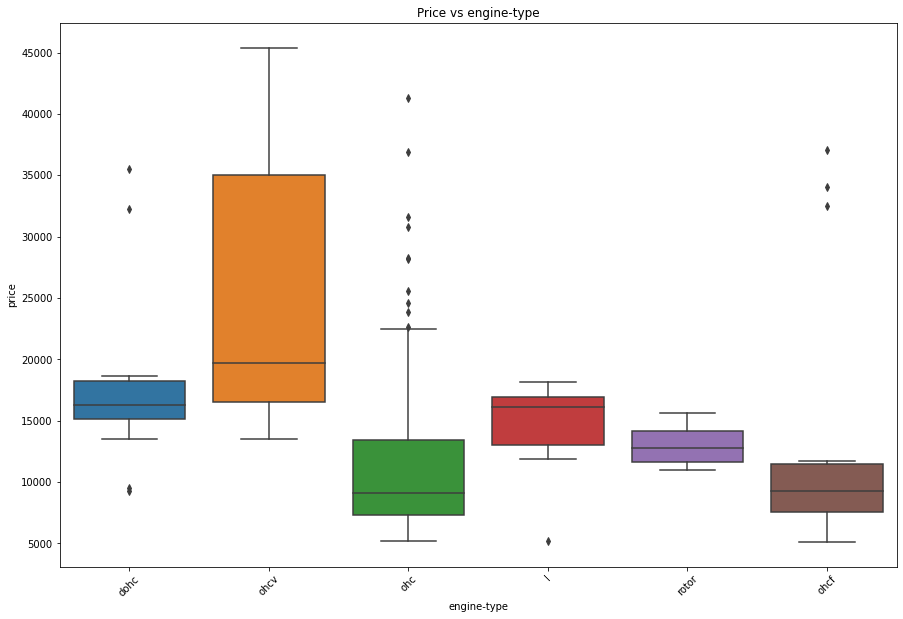

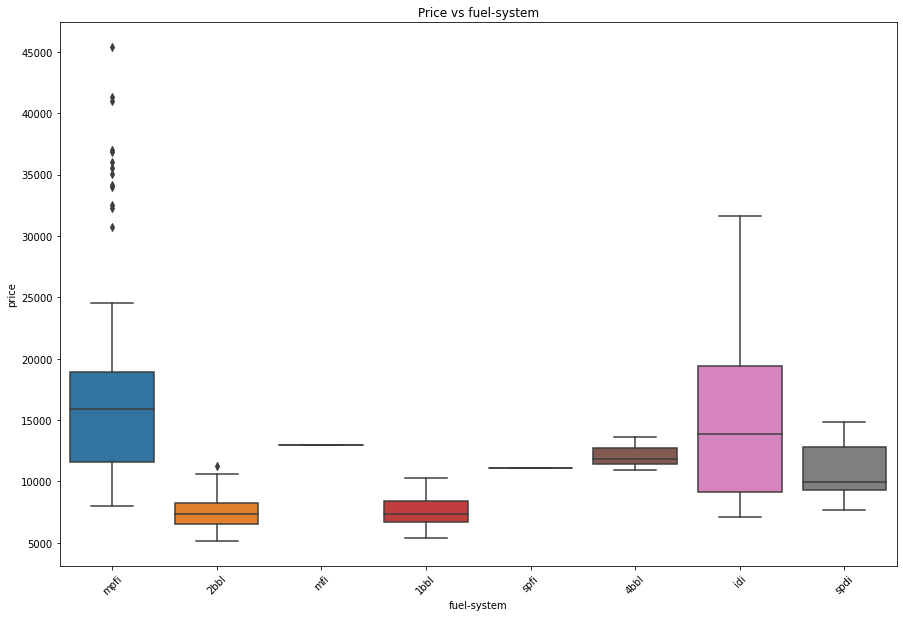

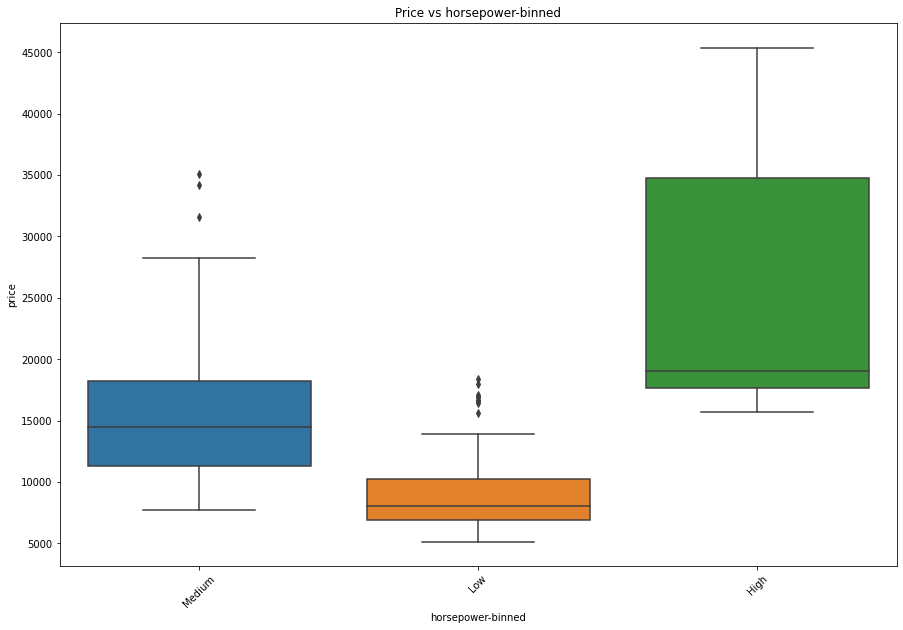

In [50]:
#Plotting Box Plots to see if categorical variable has any impact on price or not
for var in categorical:
    plt.figure(figsize = (15,10))
    sns.boxplot(data=df, x = var, y = 'price')
    plt.title('Price vs ' + var)
    plt.xticks(rotation = 45)
    plt.show()

In [51]:
#engine-location is heavily imbalanced so we'll remove it
#aspiration is imbalanced and does not seem to affect price much
drop_variables += ['aspiration', 'engine-location']

In [52]:
#To check correlation of price with other variables
#Have used this instead of a heatmap of the entire correlation matrix because there are a lot of columns

df.corr()['price']

symboling           -0.082391
normalized-losses    0.133999
num-of-doors         0.042435
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
num-of-cylinders     0.708645
engine-size          0.872335
bore                 0.543155
stroke               0.082310
compression-ratio    0.071107
horsepower           0.809575
peak-rpm            -0.101616
city-mpg            -0.686571
highway-mpg         -0.704692
price                1.000000
city-L/100km         0.789898
diesel               0.110326
gas                 -0.110326
Name: price, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/di

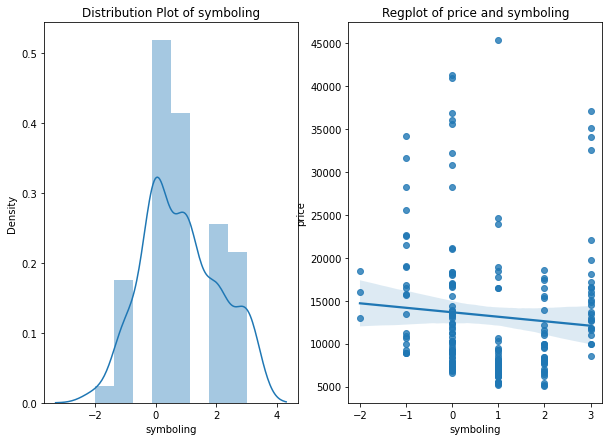

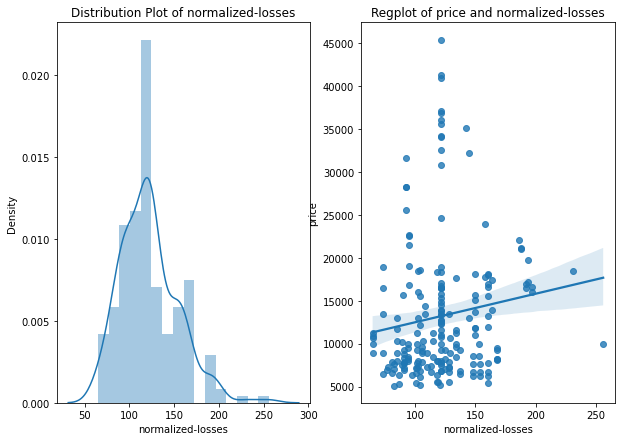

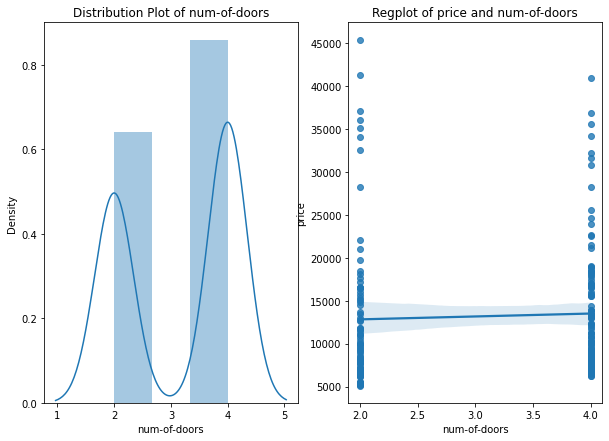

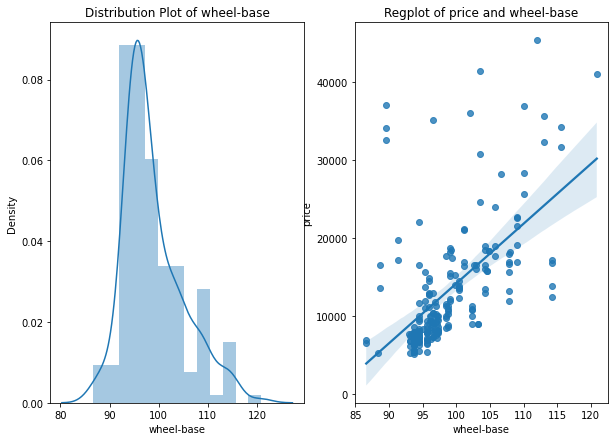

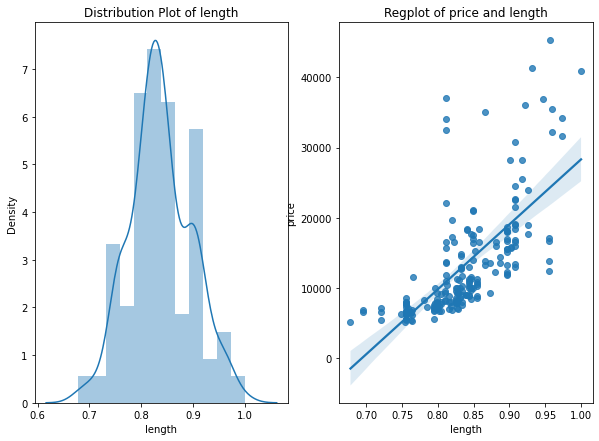

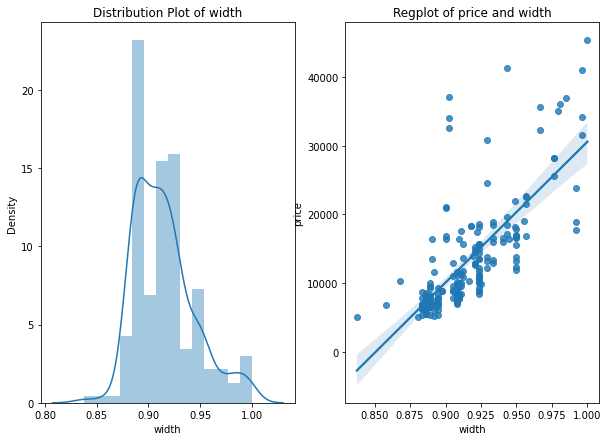

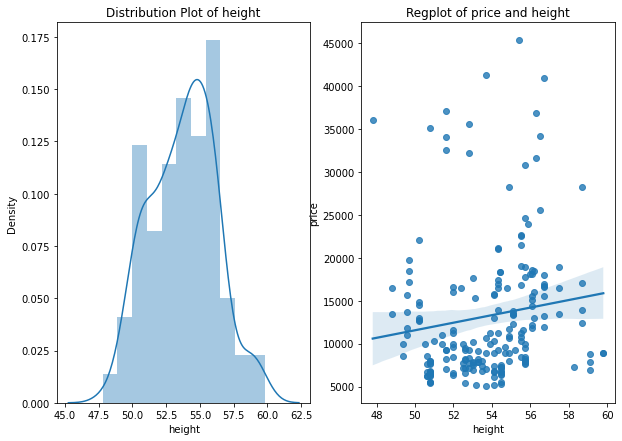

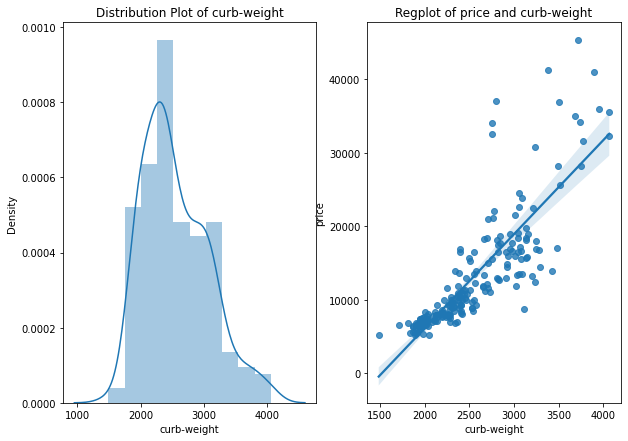

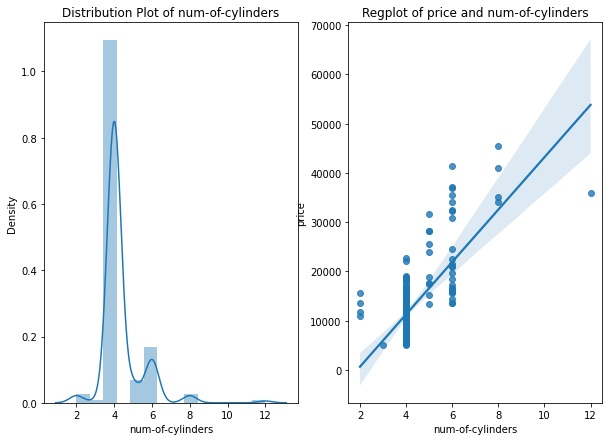

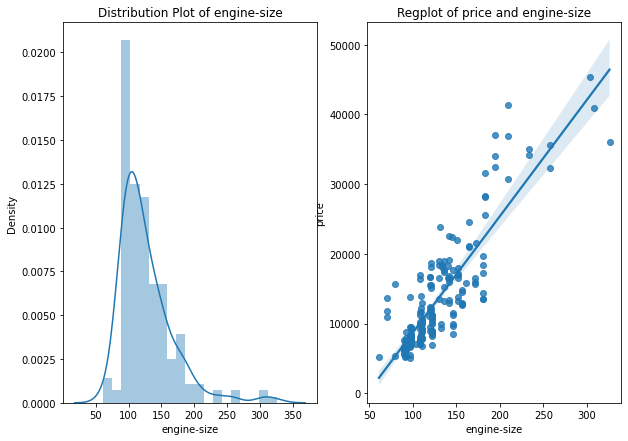

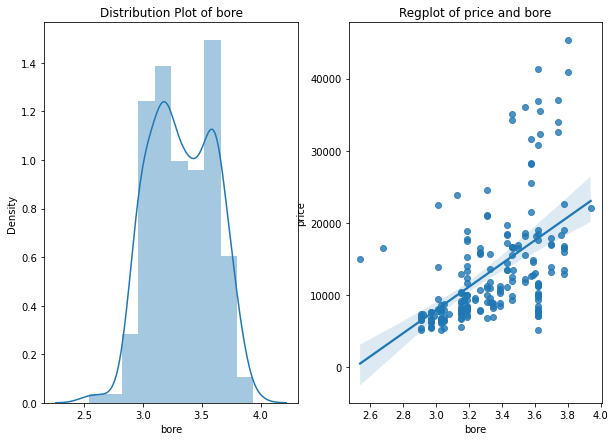

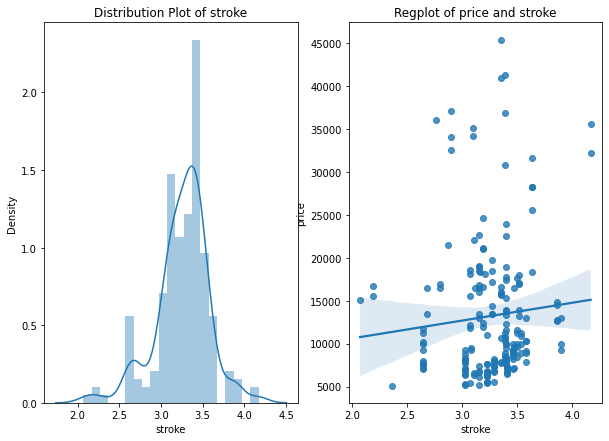

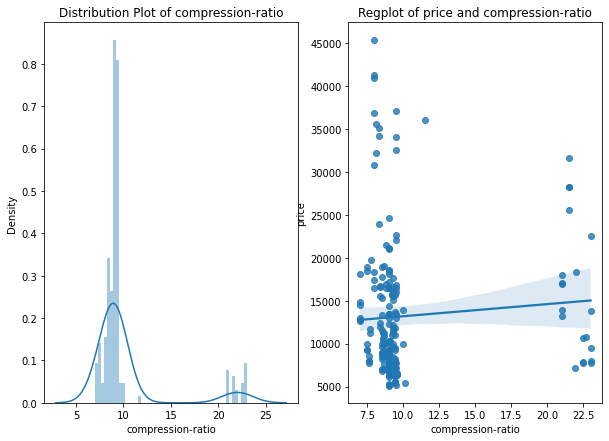

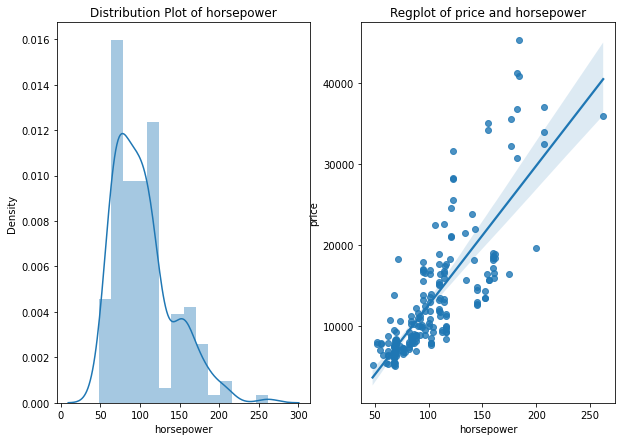

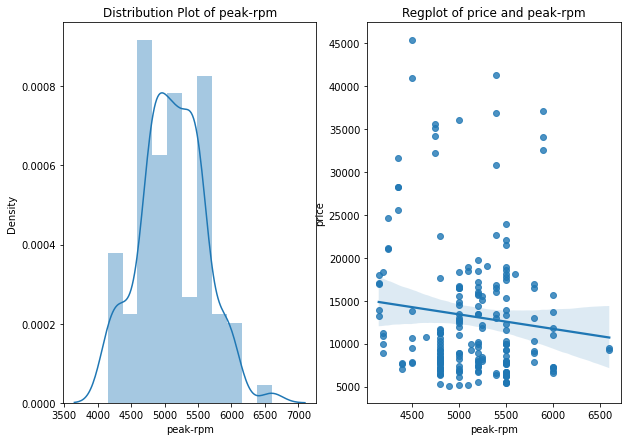

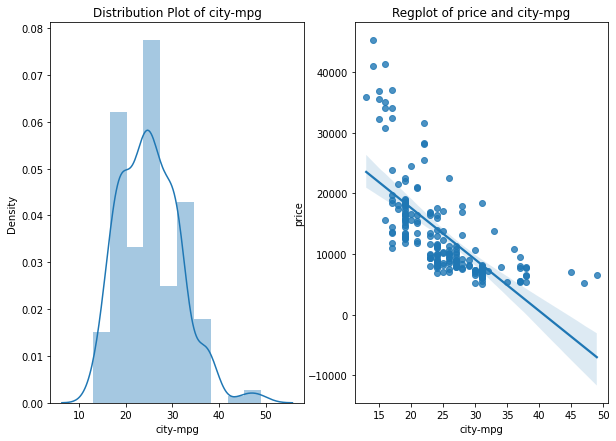

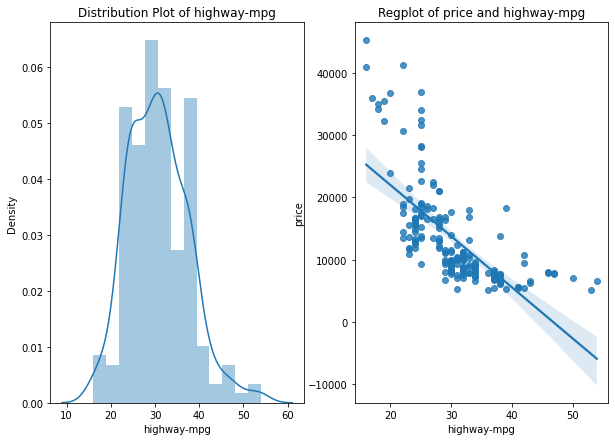

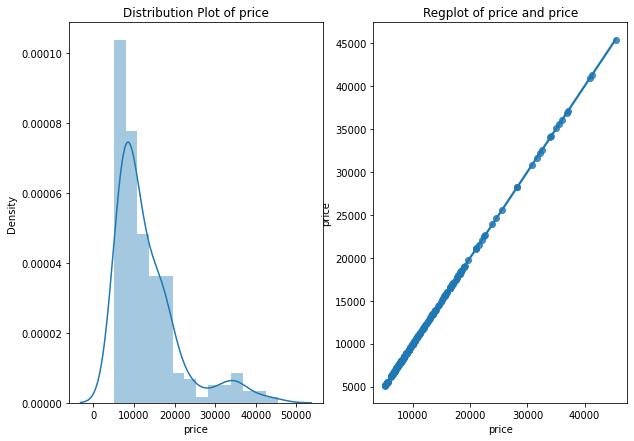

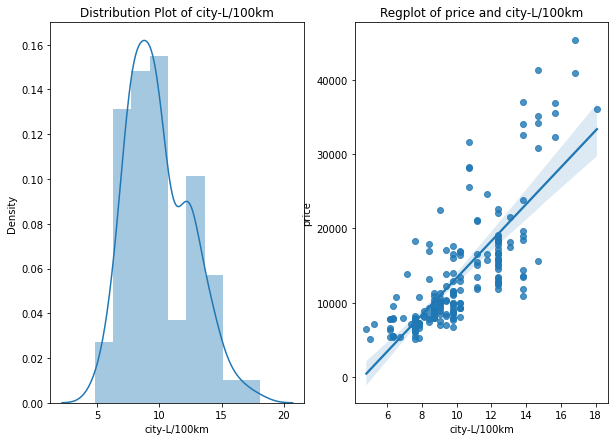

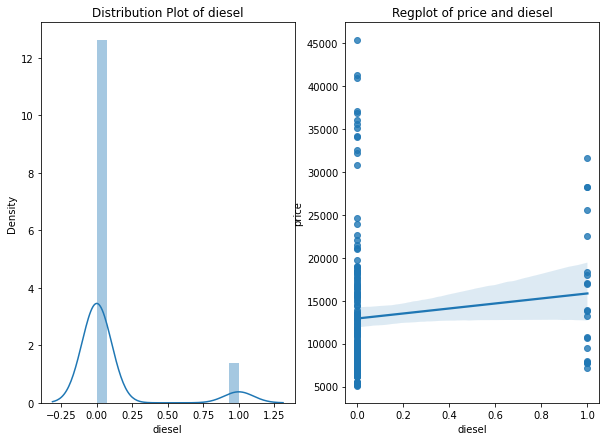

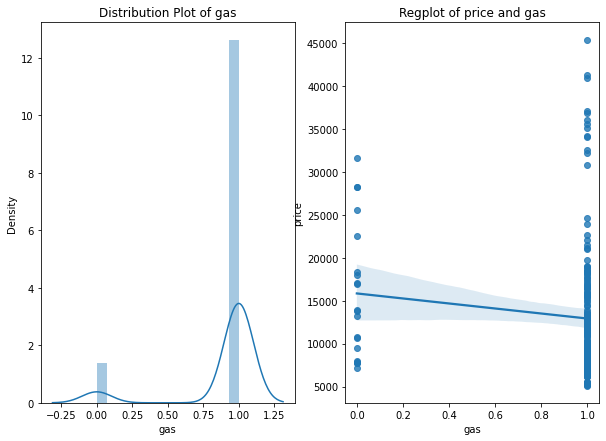

In [53]:
 #Features with poor correlation-> 'symboling', 'normalized-losses', 'height', 'stroke', 'compression-ratio', 'peak-rpm', 'diesel', 'num-of-doors

 #Inspecting Numerical Variables and their relationship with price graphically
for var in numeric:
    fig, ax = plt.subplots(1, 2, figsize=(10,7))
    sns.distplot(df[var], kde=True, ax=ax[0])
    ax[0].set_title('Distribution Plot of ' + var)

    sns.regplot(data=df, x = var, y = 'price', ax = ax[1])
    ax[1].set_title('Regplot of price and ' + var)

In [54]:
#Dropping these variables due to poor correlation -> less than 0.15
drop_variables += ['symboling', 'normalized-losses', 'height', 'stroke', 'compression-ratio', 'peak-rpm', 'diesel', 'num-of-doors']

In [55]:
df.drop(drop_variables, axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   make              201 non-null    object 
 1   body-style        201 non-null    object 
 2   drive-wheels      201 non-null    object 
 3   wheel-base        201 non-null    float64
 4   length            201 non-null    float64
 5   width             201 non-null    float64
 6   curb-weight       201 non-null    int64  
 7   engine-type       201 non-null    object 
 8   num-of-cylinders  201 non-null    int64  
 9   engine-size       201 non-null    int64  
 10  fuel-system       201 non-null    object 
 11  bore              201 non-null    float64
 12  horsepower        201 non-null    float64
 13  city-mpg          201 non-null    int64  
 14  highway-mpg       201 non-null    int64  
 15  price             201 non-null    float64
 16  city-L/100km      201 non-null    float64
dt

In [56]:
#Let's look for dependent variables
df.corr().style.background_gradient(cmap = 'coolwarm')

,wheel-base,length,width,curb-weight,num-of-cylinders,engine-size,bore,horsepower,city-mpg,highway-mpg,price,city-L/100km
wheel-base,1.000000,0.876024,0.814507,0.782097,0.348931,0.572027,0.493244,0.371147,-0.470606,-0.543304,0.584642,0.476153
length,0.876024,1.000000,0.857170,0.880665,0.440348,0.685025,0.608971,0.579821,-0.665192,-0.698142,0.690628,0.657373
width,0.814507,0.857170,1.000000,0.866201,0.520118,0.729436,0.544885,0.615077,-0.633531,-0.680635,0.751265,0.673363
curb-weight,0.782097,0.880665,0.866201,1.000000,0.604454,0.849072,0.644060,0.757976,-0.749543,-0.794889,0.834415,0.785353
num-of-cylinders,0.348931,0.440348,0.520118,0.604454,1.000000,0.847639,0.202661,0.668701,-0.439432,-0.473746,0.708645,0.556264
engine-size,0.572027,0.685025,0.729436,0.849072,0.847639,1.000000,0.572609,0.822676,-0.650546,-0.679571,0.872335,0.745059
bore,0.493244,0.608971,0.544885,0.644060,0.202661,0.572609,1.000000,0.566936,-0.582027,-0.591309,0.543155,0.554610
horsepower,0.371147,0.579821,0.615077,0.757976,0.668701,0.822676,0.566936,1.000000,-0.822214,-0.804575,0.809575,0.889488
city-mpg,-0.470606,-0.665192,-0.633531,-0.749543,-0.439432,-0.650546,-0.582027,-0.822214,1.000000,0.972044,-0.686571,-0.949713
highway-mpg,-0.543304,-0.698142,-0.680635,-0.794889,-0.473746,-0.679571,-0.591309,-0.804575,0.972044,1.000000,-0.704692,-0.930028


In [57]:
"""
dropping more variables with high correlation (>0.85)-> 

curb-weight has a high correlation with length and width, length and width have a poor correlation with price so we can remove both of them and keep curb-weight
highway-mpg and city-mpg have a high correlation with city-L/100km. Since city-L/100km has the highest correlation with price, we'll keep that.
#['length', 'width', 'highway-mpg', 'city-mpg']
"""
df.drop(['length', 'width', 'highway-mpg', 'city-mpg'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   make              201 non-null    object 
 1   body-style        201 non-null    object 
 2   drive-wheels      201 non-null    object 
 3   wheel-base        201 non-null    float64
 4   curb-weight       201 non-null    int64  
 5   engine-type       201 non-null    object 
 6   num-of-cylinders  201 non-null    int64  
 7   engine-size       201 non-null    int64  
 8   fuel-system       201 non-null    object 
 9   bore              201 non-null    float64
 10  horsepower        201 non-null    float64
 11  price             201 non-null    float64
 12  city-L/100km      201 non-null    float64
dtypes: float64(5), int64(3), object(5)
memory usage: 20.5+ KB


## 3. Generate a Linear Regression equation

In [58]:
categorical = df.select_dtypes(include = ['object']).columns
numeric = list(df.select_dtypes(exclude=['object']).columns)
numeric.remove('price')

In [59]:
#Onehot Encoding for all categorical variables
#Creating a pipeline for onehot encoding and standardization
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ss = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')


#Tried this to understand it. It's a nice trick, though I couldn't figure out how to get feature names from it
full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), numeric),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical)
])

In [60]:
X = df.drop('price', axis=1)
y = df['price']

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.2)

In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 198 to 102
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   make              160 non-null    object 
 1   body-style        160 non-null    object 
 2   drive-wheels      160 non-null    object 
 3   wheel-base        160 non-null    float64
 4   curb-weight       160 non-null    int64  
 5   engine-type       160 non-null    object 
 6   num-of-cylinders  160 non-null    int64  
 7   engine-size       160 non-null    int64  
 8   fuel-system       160 non-null    object 
 9   bore              160 non-null    float64
 10  horsepower        160 non-null    float64
 11  city-L/100km      160 non-null    float64
dtypes: float64(4), int64(3), object(5)
memory usage: 16.2+ KB


In [63]:
#Defining it as a function to avoid repition of steps
def transform(X_train, flag = 0, numeric=numeric, categorical=categorical, ss=ss, ohe=ohe ):
    if flag == 'fit_transform':
        #Standard Scaling
        X_train[numeric] = ss.fit_transform(X_train[numeric])
        #Onehot encoding
        X_train_ohe = ohe.fit_transform(X_train[categorical])
        X_train_ohe = pd.DataFrame(X_train_ohe.toarray())
        X_train_ohe.columns = ohe.get_feature_names_out()
        X_train_ohe.index = X_train.index
        return pd.concat((X_train[numeric], X_train_ohe), axis = 1)
    else:
        #Standard Scaling
        X_train[numeric] = ss.transform(X_train[numeric])
        #Onehot encoding
        X_train_ohe = ohe.transform(X_train[categorical])
        X_train_ohe = pd.DataFrame(X_train_ohe.toarray())
        X_train_ohe.columns = ohe.get_feature_names_out()
        X_train_ohe.index = X_train.index
        return pd.concat((X_train[numeric], X_train_ohe), axis = 1)

In [64]:
X_train = transform(X_train, 'fit_transform')

In [65]:
from sklearn.linear_model import LinearRegression
lrmodel = LinearRegression()
lrmodel.fit(X_train, y_train)

LinearRegression()

In [66]:
#Testing on Test
y_pred = lrmodel.predict(transform(X_test))

In [67]:
#Printing the Equation
coef = list(lrmodel.coef_)
variables = list(X_train.columns)
print("Equation : ")
for i in range(len(coef)):
    print(f"{coef[i]} x {variables[i]} + ", end = "")
print(lrmodel.intercept_)

Equation : 
809.3042952474609 x wheel-base + 1116.557446169893 x curb-weight + 190.168177679416 x num-of-cylinders + 1692.221267392239 x engine-size + -678.5014148826863 x bore + 430.0741298151077 x horsepower + 1449.1357811420414 x city-L/100km + -1526.0308083356283 x make_alfa-romero + 2329.1664918113156 x make_audi + 5011.708756621922 x make_bmw + -426.34004855175925 x make_chevrolet + -1638.841618022117 x make_dodge + 376.8787726281922 x make_honda + -4893.069293700437 x make_isuzu + 3359.399287776713 x make_jaguar + -373.5310988725065 x make_mazda + 9365.92297118887 x make_mercedes-benz + -343.513797675467 x make_mercury + -1682.3068436401593 x make_mitsubishi + -1440.713020894079 x make_nissan + -4170.845321730306 x make_peugot + -2119.747744687311 x make_plymouth + 6912.365549550203 x make_porsche + -2020.385954290789 x make_renault + 1408.2912588147267 x make_saab + -6552.404830239928 x make_subaru + -1965.8200376730945 x make_toyota + -892.1070603815878 x make_volkswagen + 128

## 4. Use a residual plot to inspect if LR fits the model

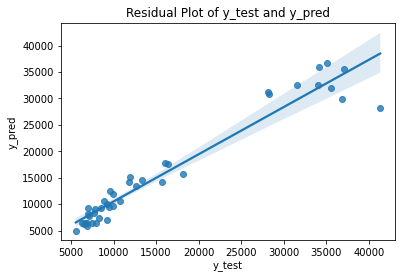

In [68]:
#Plotting y test vs y pred - we expect a straight line
sns.regplot(x=y_test, y = y_pred)
plt.title('Residual Plot of y_test and y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



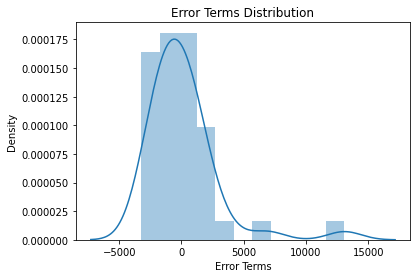

In [69]:
#Plotting Error Terms - we expect to see a normal distribution
sns.distplot(y_test - y_pred)
plt.title("Error Terms Distribution")
plt.xlabel('Error Terms')
plt.show()

## 5. Use R2 and MSE to determine the accuracy of the LR fit 

In [70]:
#Import Libraries
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [71]:
#Accuracy of alldata
ad_X_train, ad_X_test, ad_y_train, ad_y_test = train_test_split(alldata.drop('price', axis = 1),alldata['price'], random_state = 42, test_size = 0.2)

#This is where full_pipeline will come in handy
ad_X_train = full_pipeline.fit_transform(ad_X_train)
ad_X_test = full_pipeline.transform(ad_X_test)

ad_model = LinearRegression()
ad_model.fit(ad_X_train, ad_y_train)

#Measuring R2 of Test Data
ad_y_pred = ad_model.predict(ad_X_test)
print(r2_score(ad_y_test, ad_y_pred))

#No feature elimination gives us an R2 of 0.935

0.9350293838709316


In [72]:
#Let us test R2 after doing feature engineering
#Accuracy on test dataset - r2
print(r2_score(y_test, y_pred))

#0.935 is a good r2 score - we removed features without compromising on accuracy
"""
We went from 28 features at the beginning to 11 features without comprimising on R2 score
"""

0.9350293801479705


'\nWe went from 28 features at the beginning to 11 features without comprimising on R2 score\n'

In [73]:
#Accuracy on train dataset - r2
print(r2_score(y_train, lrmodel.predict(X_train)))

#0.94 is a good r2 score

0.949899415869094


In [74]:
#RMSE
print("Test Set RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
#Mean Absolute Error
print("Test Set MAE: ", mean_absolute_error(y_test, y_pred))
#RMSE
print("Train Set RMSE: ", np.sqrt(mean_squared_error(y_train, lrmodel.predict(X_train))))
#Mean Absolute Error
print("Train Set MAE: ", mean_absolute_error(y_train, lrmodel.predict(X_train)))

Test Set RMSE:  2819.3874661134973
Test Set MAE:  1798.0086577510976
Train Set RMSE:  1511.9212757454425
Train Set MAE:  1079.4653348232175


# Question 3 (20 points)

### In this assignment, you will experiment with a toy dataset – the Iris dataset.

## 1. Load the Iris dataset.

In [75]:
# use -  sklearn.datasets.load_iris
from sklearn.datasets import load_iris
data = load_iris()

In [76]:
df = pd.DataFrame(data['data'])
df.columns = data['feature_names']
df['target'] = data['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [78]:
df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

## 2. The Iris data has 3 classes. For the purpose of this assignment, you will modify it such that it has two classes – specifically, you will merge the “setosa” and “versicolor” classes.

In [79]:
print(data['target_names'])
#0 -> setosa, 1 -> versicolor, 2 -> virginica

['setosa' 'versicolor' 'virginica']


In [80]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [81]:
df['target'] = df['target'].map({0:0, 1:0, 2:1})
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1
149,5.9,3.0,5.1,1.8,1


## 3. Construct a training set and a testing set using 80-20 split using random sampling.

In [82]:
X = df.drop('target', axis = 1)
y = df['target']

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 9, test_size = 0.2)

In [84]:
y_train.value_counts()

0    78
1    42
Name: target, dtype: int64

## 4. Use Logistic Regression as a black box classifier and assess the performance.

In [85]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 42, solver='liblinear', multi_class='auto')

In [86]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [87]:
y_pred = model.predict(X_test)

In [88]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, classification_report

In [89]:
#Testing on test data
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[22  0]
 [ 0  8]]


In [90]:
#Testing on training data
print(confusion_matrix(y_train, model.predict(X_train)))

[[75  3]
 [ 0 42]]


In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 5. Implement stratified sampling, again using the 80-20 split. Decide the stratification variable and explain your choice.

In [92]:
from sklearn.model_selection import StratifiedShuffleSplit

In [93]:
sss = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=42)
#sss.split(X, y) is a generator function
for train_index, test_index in sss.split(X, y):
    None

In [94]:
train_index

array([ 33, 106,  54,  55,  19, 146,  25, 133, 135, 117, 105,  48,  62,
        58,  43,  11,   0, 108, 137,  69,  81,  77, 131,  80,  89, 103,
       111,  22, 121,  16,  93,   8,  68,  31, 139, 148,  49,  61, 144,
        56,   4,  13,  88, 130,  28,  44, 101,  65,  76,  18,  45,  50,
       100,  57,  15, 149,  17, 136,  12, 142,  85,  32, 113,  26,  38,
        46, 122,  59,  78, 115,  53,  35,  30, 119,  64, 129,   3, 145,
       123,  94,  42, 114,  24,  66, 120,  10, 109,  41,  97,  70,  75,
       110,  40,  83, 124, 118, 112,  98, 126,  72, 143,  95, 125, 102,
        39,   6,  99,  27,  34,  67,  96, 128,  36,  79,  47,  73,   5,
         9,   7,  90])

In [95]:
X_train_sss = X.loc[train_index]
y_train_sss = y.loc[train_index]
X_test_sss = X.loc[test_index]
y_test_sss = y.loc[test_index]

In [96]:
y_train.value_counts()

0    78
1    42
Name: target, dtype: int64

In [97]:
#This is equal to the proportion of these classes
y_train_sss.value_counts()

0    80
1    40
Name: target, dtype: int64

In [98]:
y.value_counts()

0    100
1     50
Name: target, dtype: int64

In [99]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 42, solver='liblinear', multi_class='auto')

In [100]:
model.fit(X_train_sss, y_train_sss)

LogisticRegression(random_state=42, solver='liblinear')

In [101]:
y_pred_sss = model.predict(X_test_sss)

In [102]:
from sklearn.metrics import confusion_matrix

#Testing on test data
confusion = confusion_matrix(y_test_sss, y_pred_sss)
print(confusion)

[[20  0]
 [ 0 10]]


In [103]:
#Testing on training data
print(confusion_matrix(y_train_sss, model.predict(X_train_sss)))

[[77  3]
 [ 0 40]]


## 6. Re-assess the performance. Comment on any changes from the random sampling case. If there is no significant change, comment on why or why not?

In [104]:
#Random Sampling
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [105]:
#Stratified Shuffle Sampling
print(classification_report(y_test_sss, y_pred_sss))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



There is no significant change in this particular case, though we do see that while sampling the proportion of different classes of y in our training and test set is exactly similar to that in the entire data. 

However, random sampling in this case also gives us samples in a similar proportion, hence we don't see much change here